In [14]:
import pandas as pd
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
churn_data.pop('RowNumber')
#churn_data['Geography'] = churn_data['Geography'].astype('category')
churn_data['Gender'] = churn_data['Gender'].astype('category')
#churn_data['NumOfProducts'] = churn_data['NumOfProducts'].astype('category')
#churn_data['HasCrCard'] = churn_data['HasCrCard'].astype('category')
churn_data['IsActiveMember'] = churn_data['IsActiveMember'].astype('category')
churn_data['Exited'] = churn_data['Exited'].astype('category')

churn_data['Exited'] = churn_data['Exited'].cat.rename_categories({
    0: 'Лояльные клиенты',
    1: 'Ушедшие клиенты'
})
churn_data['IsActiveMember'] = churn_data['IsActiveMember'].cat.rename_categories({
    0: 'Не активный',
    1: 'Активный'
})

churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,Активный,101348.88,Ушедшие клиенты
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,Активный,112542.58,Лояльные клиенты
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,Не активный,113931.57,Ушедшие клиенты
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,Не активный,93826.63,Лояльные клиенты
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,Активный,79084.10,Лояльные клиенты


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px

plt.style.use('default')

9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

Text(0.5, 1.0, 'Соотношение ушедших и лояльных клиентов')

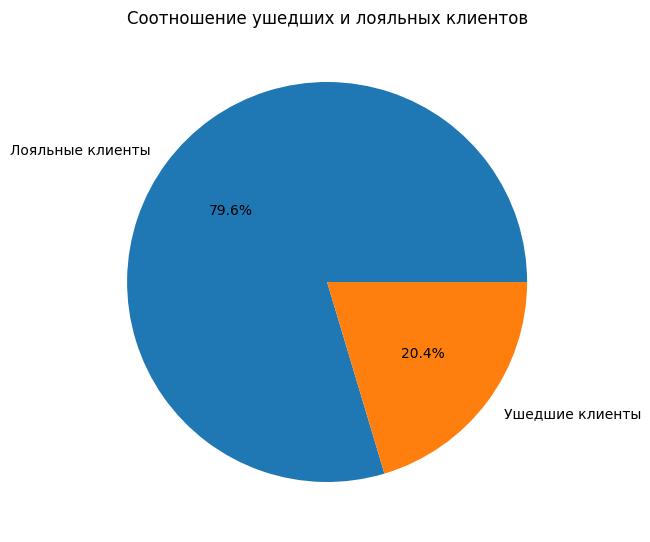

In [17]:
ratio_data = churn_data['Exited'].value_counts()

fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    ratio_data,
    labels=ratio_data.index,
    autopct='%.1f%%'
)

axes.set_title('Соотношение ушедших и лояльных клиентов')

Как видно из графика, лояльных клиентов примерно в 4 раза больше, чем ушедших.

9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

Text(0, 0.5, 'Число клиентов')

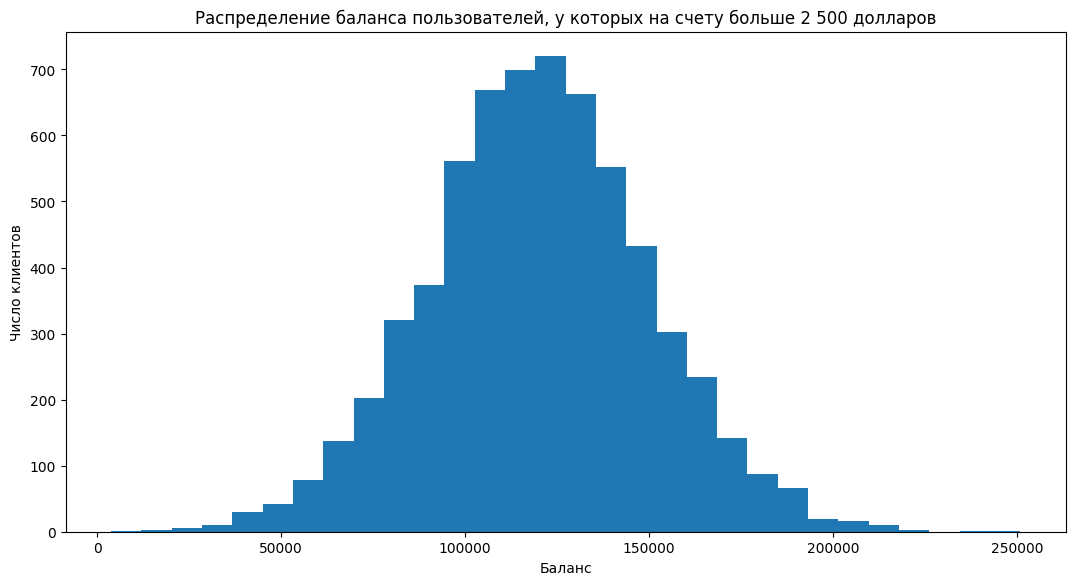

In [18]:
balance_distribution_data = churn_data[churn_data['Balance'] > 2500]['Balance']

fig = plt.figure(figsize=(10, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(
    balance_distribution_data,
    label=['Баланс пользователей'],
    bins=30
)

axes.set_title('Распределение баланса пользователей, у которых на счету больше 2 500 долларов')
axes.set_xlabel('Баланс')
axes.set_ylabel('Число клиентов')

Как видно из графика, большинство пользователей имеют на счету от 100 000 до 150 000 долларов. Пик приходится на примерно 125 000 долларов.

9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

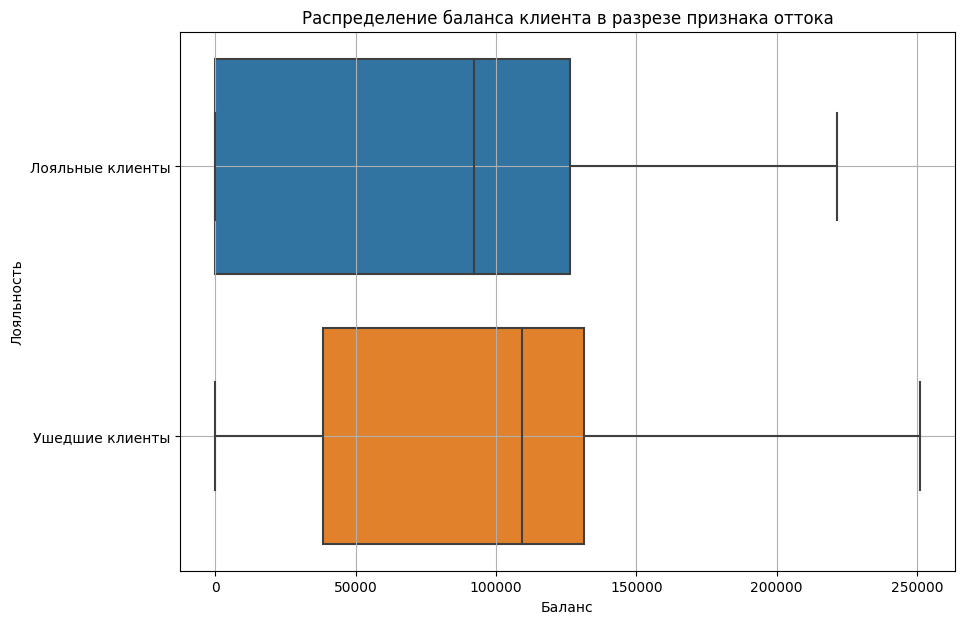

In [19]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=churn_data,
    y='Exited',
    x='Balance',
    orient='h',
)
boxplot.set_title('Распределение баланса клиента в разрезе признака оттока')
boxplot.set_xlabel('Баланс')
boxplot.set_ylabel('Лояльность')
boxplot.grid()

Баланс ушедших клиентов в среднем выше, чем баланс лояльных клиентов. Возможно, что другие банки предлагают лучшие услуги для более высоких сумм на счетах.

9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

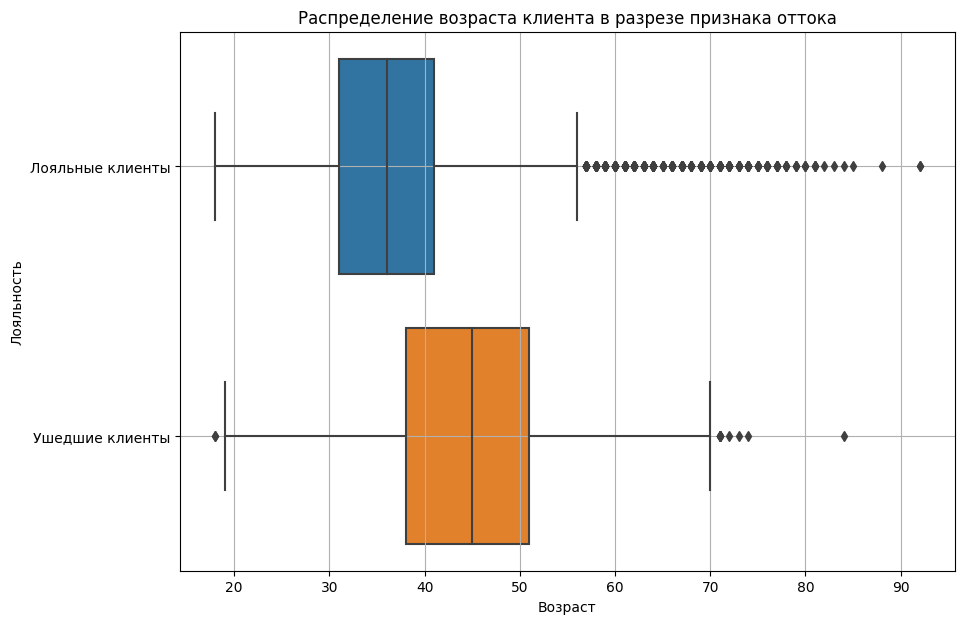

In [20]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=churn_data,
    y='Exited',
    x='Age',
    orient='h',
)
boxplot.set_title('Распределение возраста клиента в разрезе признака оттока')
boxplot.set_xlabel('Возраст')
boxplot.set_ylabel('Лояльность')
boxplot.grid()

Потенциальных выбросов больше в группе лояльных клиентов. Банку следует обратить внимание на возрастную группу 40-50 лет.

9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

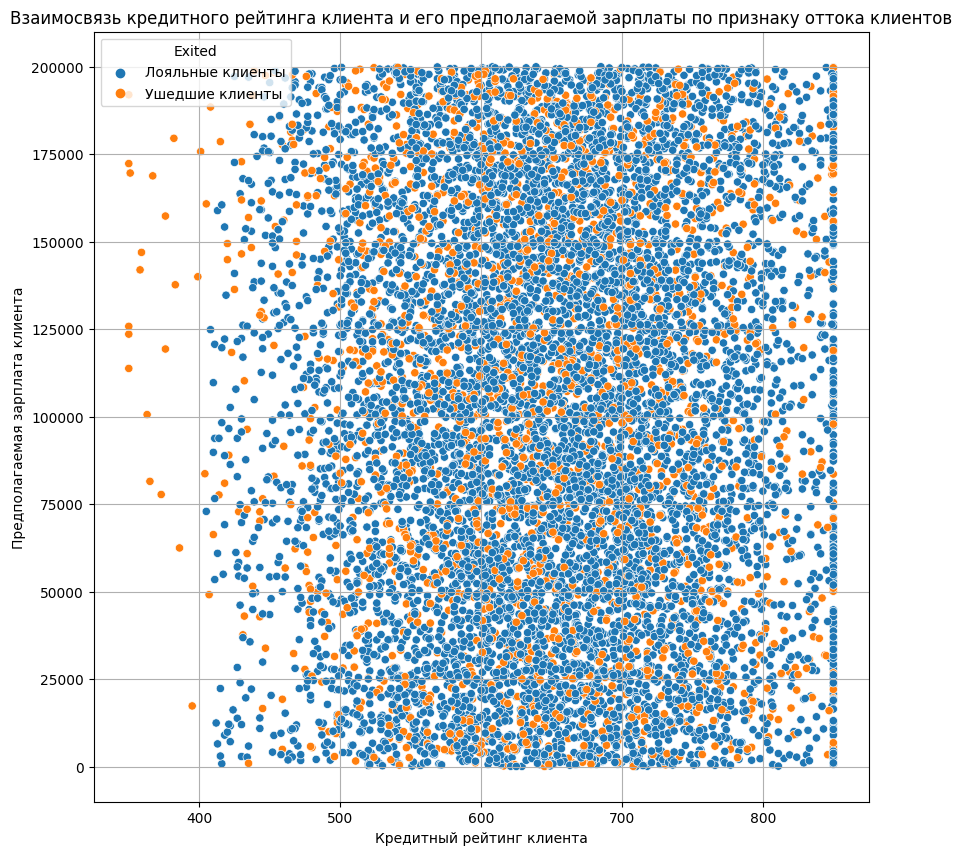

In [21]:
fig = plt.figure(figsize=(10, 10))
axes = sns.scatterplot(
    data=churn_data, 
    x='CreditScore', 
    y='EstimatedSalary',
    hue='Exited',
)

axes.set_title('Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты по признаку оттока клиентов')
axes.set_xlabel('Кредитный рейтинг клиента')
axes.set_ylabel('Предполагаемая зарплата клиента')
axes.grid()

Явной взаимосвязи между кредитным рейтингом клиента и его предполагаемой зарплаты по признаку оттока клиентов не наблюдается.

9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

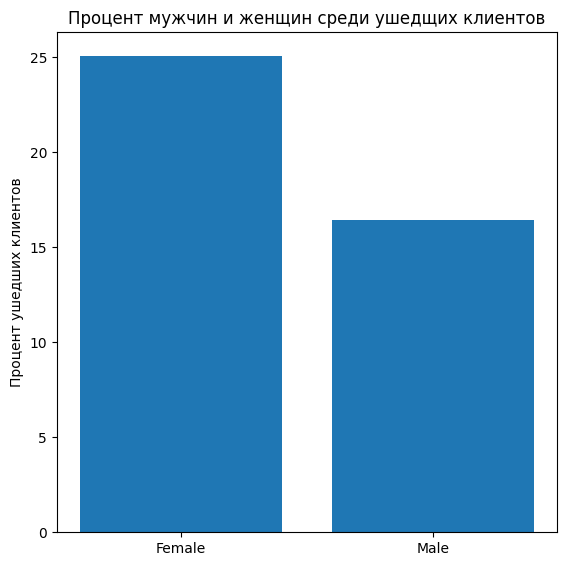

In [22]:
churn_data['Exited'] = churn_data['Exited'].cat.rename_categories({
    'Лояльные клиенты': 0,
    'Ушедшие клиенты': 1
})
churn_data['Exited'] = churn_data['Exited'].astype('int64')

gender_data = churn_data.groupby('Gender')['Exited'].mean() * 100

fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])

axes.bar(
    x = gender_data.index,
    height = gender_data
)

axes.set_ylabel('Процент ушедших клиентов')
axes.set_title('Процент мужчин и женщин среди ушедщих клиентов')

churn_data['Exited'] = churn_data['Exited'].astype('category')
churn_data['Exited'] = churn_data['Exited'].cat.rename_categories({
    0: 'Лояльные клиенты',
    1: 'Ушедшие клиенты'
})

Как видно из графика, женщины уходят примерно в полтора раза чаще, чем мужчины.

9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

In [23]:
data = churn_data.groupby(['NumOfProducts', 'Exited'], as_index=False).count()

fig = px.bar(
    data_frame=data,
    x='NumOfProducts',
    y='CustomerId',
    color='Exited',
    height=600,
    width=1000,
    title='Взаимосвязь оттока клиентов и числа приобретённых у банка услуг',
    labels={'CustomerId': 'Количество клиентов', 'NumOfProducts': 'Число приобретённых услуг банка'}
)
fig.show()

Подавляющее большинство клиентов, что приобрели 3 или 4 услуги, ушли, но общее количество таких клиентов очень мало по сравнению с числом клиентов, что приобрели 1 или 2 услуги.
Наименьший отток клиентов среди тех, кто приобрёл 2 услуги.
Среди клиентов, что приобрели 1 услуги, ушла примерно четверть.

9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

In [24]:
data = churn_data.groupby(['IsActiveMember', 'Exited'], as_index=False).count()

fig = px.bar(
    data_frame=data,
    x='IsActiveMember',
    y='CustomerId',
    color='Exited',
    height=600,
    width=1000,
    title='Взаимосвязь оттока клиентов и наличия статуса активного клиента банка',
    labels={'CustomerId': 'Количество клиентов', 'IsActiveMember': 'Статус активности клиента банка'}
)
fig.show()

Как видно из графика, большинство ушедших клиентов не являются активными клиентами банка. Можно рассмотреть возможность предложений новых банковских услуг для ушедших неактивных клиентов.

9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [25]:
choropleth_data = churn_data[churn_data['Exited'] == 'Ушедшие клиенты'].groupby(['Geography'], as_index=False).count()
temp_data = churn_data.groupby(['Geography'], as_index=False).count()
choropleth_data['Доля ушедших клиентов'] = round(choropleth_data['Age'] / temp_data['Age'] * 100, 2)

fig = px.choropleth(
    data_frame=choropleth_data,
    locations="Geography",
    locationmode = "country names",
    color="Доля ушедших клиентов",
    range_color=[0, 100],
    title='Доля ушедших клиентов',
    width=800,
    height=500,
    color_continuous_scale='Reds'
)

fig.show()

Наибольшая доля ушедших клиентов в Германии. Это может быть связано с тем, что в Германии тарифы услуг банков часто меняются, поэтому клиенты тоже часто меняют банки исходя из привлекательности для них предложений других банков.

9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

Text(0.5, 23.52222222222222, 'Сколько лет клиент пользуется услугами банка')

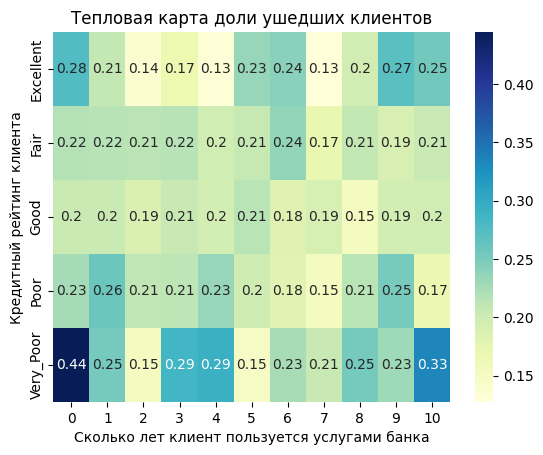

In [26]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

churn_data['Exited'] = churn_data['Exited'].cat.rename_categories({
    'Лояльные клиенты': 0,
    'Ушедшие клиенты': 1
})
churn_data['Exited'] = churn_data['Exited'].astype('int64')

churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat).astype('category')
churn_data['Tenure'] = churn_data['Tenure'].astype('category')
pivot_data = churn_data.groupby(['CreditScoreCat', 'Tenure'])['Exited'].mean().unstack()

churn_data['Exited'] = churn_data['Exited'].astype('category')
churn_data['Exited'] = churn_data['Exited'].cat.rename_categories({
    0: 'Лояльные клиенты',
    1: 'Ушедшие клиенты'
})

heatmap = sns.heatmap(data=pivot_data, cmap='YlGnBu', annot=True)
heatmap.set_title('Тепловая карта доли ушедших клиентов')
heatmap.set_ylabel('Кредитный рейтинг клиента')
heatmap.set_xlabel('Сколько лет клиент пользуется услугами банка')

Как видно из графика, наиболее часто уходят клиенты с очень низким кредитным рейтингом, которые пользовались услугами банка 0 или 10 лет.